#**import libraries**

In [ ]:
import os
import sys
import warnings
import nltk
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

%matplotlib inline
warnings.filterwarnings("ignore")

import torch
from transformers import BertTokenizer, BertModel
from scipy.spatial.distance import cosine
import pandas as pd
import kagglehub
import os
import numpy as np
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import gradio as gr
from summarytools import dfSummary
from sklearn.preprocessing import LabelEncoder
from textblob import TextBlob
from langdetect import detect
import emoji
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import wordcloud
import seaborn as sns
from imblearn.over_sampling import SMOTE
import gensim
from gensim.models import Word2Vec, KeyedVectors
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, roc_curve,  roc_auc_score, classification_report
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\couli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\couli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\couli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\couli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\couli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#**function definition**

In [4]:
def preprocess_text(text):
    if not isinstance(text, str):
        return ""

    # remove spaces
    
    
    #blob = TextBlob(text)
    #text = str(blob.correct())
    # Tokenize words 
    tokens = word_tokenize(text)

    # Remove punctuation and other character
    tokens = [word for word in tokens if word.isalnum()]

    # Remove stopwords (English)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    #perform lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

In [5]:
def text_len(df, column_name):
    
    return df[column_name].apply(lambda x: len(str(x).split()))

In [6]:
df=pd.read_csv("twitter_training.csv",encoding="ISO-8859-1",names=["id","flag","target","text"])
df=df.dropna()
df["target"].value_counts()

target
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

In [7]:
df=df[df['target'] != "Irrelevant"]

**#Preprocessing phase**

check for unique value in the target column

In [8]:
df["target"].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

remove duplicate 

In [9]:
df=df.drop_duplicates()

summerize the data set 

In [10]:
df.describe()

,id
count,59119.000000
mean,6549.695682
std,3760.941520
min,1.000000
25%,3273.000000
50%,6783.000000
75%,9713.000000
max,13198.000000


In [11]:
target= df["target"].value_counts()
target

target
Negative    21698
Positive    19713
Neutral     17708
Name: count, dtype: int64

print the length of the largest 

In [13]:
df['text'].str.len().max()

957

reduce dataset due to computational power 

In [14]:
df=df.groupby("target").apply(lambda x:x.sample(n=10000,random_state=42)).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)

In [15]:
df["target"].value_counts()

target
Neutral     10000
Negative    10000
Positive    10000
Name: count, dtype: int64

NLP preprocessing 

In [16]:
df["clean_text"]=df["text"].apply(preprocess_text)


# ***WorldCloud Review***

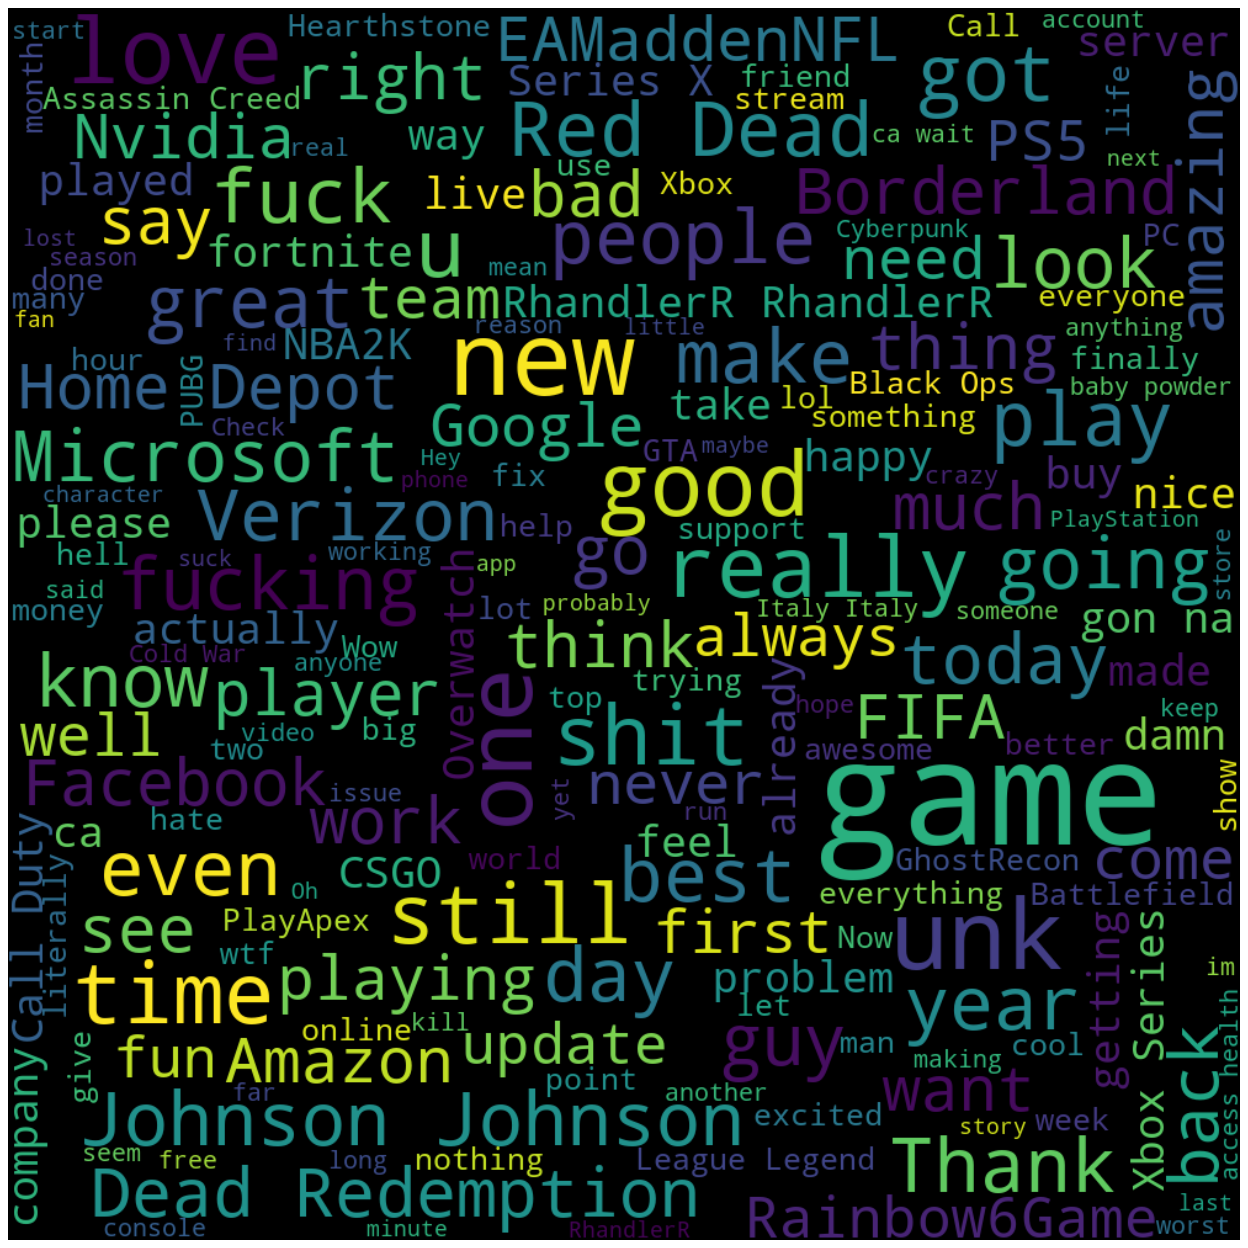

In [17]:
allwords = " ".join([wrds for wrds in df["clean_text"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

word cloud for each class

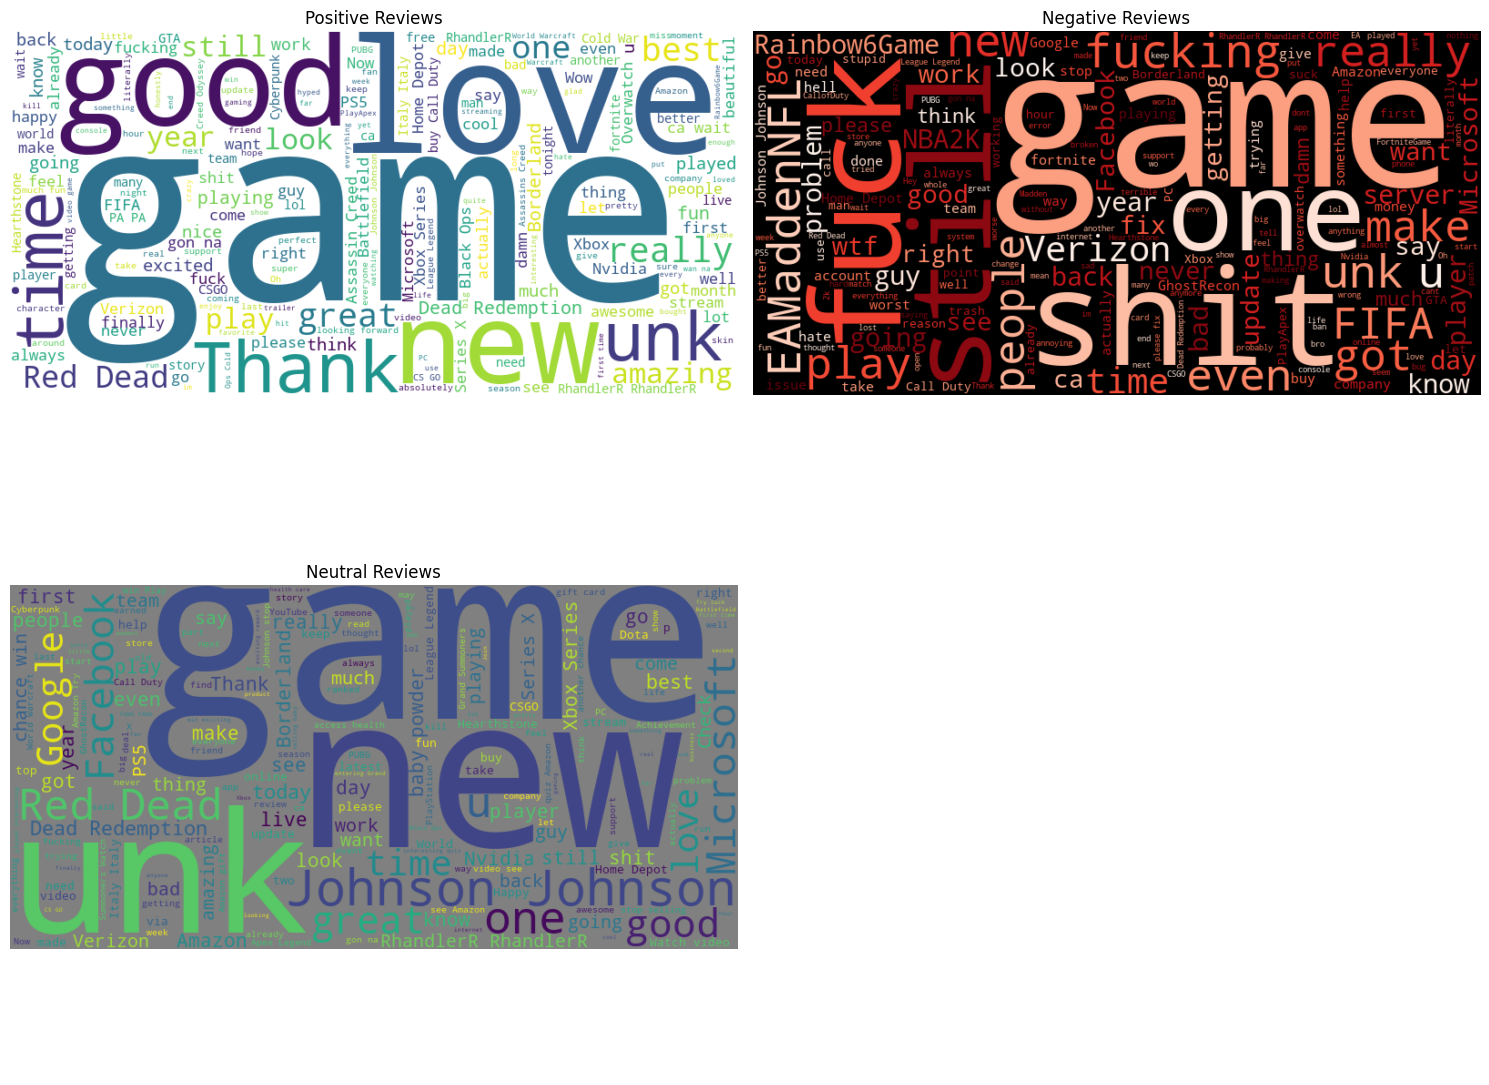

In [18]:
# Combine text data for each sentiment category
positive_text = " ".join(df[df["target"] == "Positive"]["clean_text"])
negative_text = " ".join(df[df["target"]  =="Negative"]["clean_text"])
neutral_text = " ".join(df[df["target"] == "Neutral"]["clean_text"])


# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='gray').generate(neutral_text)

# Plot word clouds
fig, ax = plt.subplots(2,2, figsize=(15, 12))

ax[0, 0].imshow(positive_wordcloud, interpolation='bilinear')
ax[0, 0].set_title("Positive Reviews")
ax[0, 0].axis("off")

ax[0, 1].imshow(negative_wordcloud, interpolation='bilinear')
ax[0, 1].set_title("Negative Reviews")
ax[0, 1].axis("off")

ax[1, 0].imshow(neutral_wordcloud, interpolation='bilinear')
ax[1, 0].set_title("Neutral Reviews")
ax[1, 0].axis("off")

ax[1, 1].axis('off')

plt.tight_layout()
plt.show()



sentiment distribution 

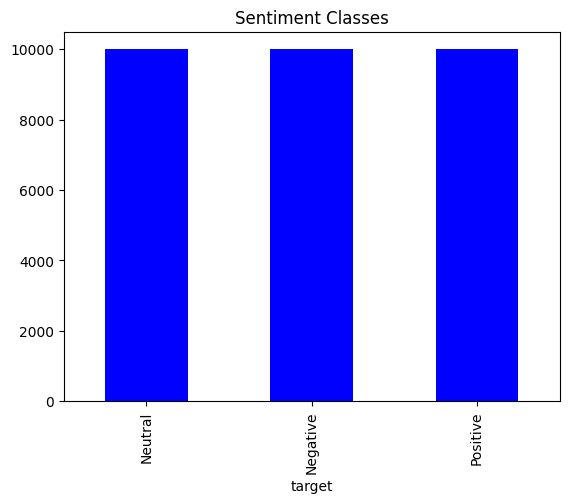

Positive tweets:
 -best game 10 best 10
 -Bundle Draven The Glorious Executioner Weapons Keychains Retweet ya want http
 -FUCKEN LATE
 -Highly recommended This perfect memorabilia give along grandkids someday
 -dog winning unk

Neutral tweets:
 -Johnson Johnson stop selling Johnson Baby Powder US Canada 2020 05 20 joh
 -In month episode Tony Oddcast RunJumpStomp help understand difference three darn
 -Every time someone like Facebook page fascist loses wallet callingallastr
 -Google could face yet another national class capital action lawsuit though time hosting Pixel 3 code issue androidpolice com 2020 06 22 goo
 -These showed Facebook memory 1 year ago Got ta love life It really rare speechless RhandlerR

Negative tweets:
 -bro went fucking flying holy shit
 -My CP suddenly went missing without buying anything wtf CfDuty
 -Sony drop
 -PlayOverwatch OverwatchFR No Ana Get Fuck Off
 -benniteGame Update patch still inventory swap team building every spin Should wait another update fix p

In [19]:
# Visualize sentiment distribution
df["target"].value_counts().plot(kind='bar', color='blue')
plt.title('Sentiment Classes')
plt.show()
# Print sample positive and negative tweets
positive_tweets = df[df['target'] == "Positive"]
neutral_tweets = df[df['target'] == "Neutral"]
negative_tweets = df[df['target'] == "Negative"]
print('Positive tweets:')
for i, row in positive_tweets[:5].iterrows():
    print(' -' + row['clean_text'])

print('\nNeutral tweets:')
for i, row in neutral_tweets[:5].iterrows():
    print(' -' + row['clean_text'])

print('\nNegative tweets:')
for i, row in negative_tweets[:5].iterrows():
    print(' -' + row['clean_text'])

word representation using word2vec

In [20]:
df["tokenized"]= df["clean_text"].apply(word_tokenize)
df["text_len"]= text_len(df,"clean_text")
# train word2vec
model= Word2Vec(sentences=df["tokenized"], vector_size=100,window=2,min_count=5,workers=-1)
# Create a word index mapping
word_index = {word: i + 1 for i, word in enumerate(model.wv.index_to_key)}

# Convert tokenized sentences to sequences of indices
df['sequences'] = df['tokenized'].apply(lambda x: [word_index.get(word, 0) for word in x])




padding sequence to ensure same size

In [21]:
max_length = df['sequences'].apply(len).max()
df['padded_sequences'] = pad_sequences(df['sequences'], maxlen=max_length, padding='post').tolist()



In [ ]:
# put for negative ,1 for neutral and 2 for positive
df["target"]= df["target"].apply(lambda x:0 if x=="Negative" else(2 if x=="Positive" else 1 ))

In [23]:
x=np.stack(df["padded_sequences"]) 
y=to_categorical(df["target"].values)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# ***Model Building and Training Model***

In [25]:
vocab_size=len(model.wv)
embedding_matrix = np.zeros((vocab_size+1 , 100))  

# Populate the embedding matrix
for word, index in word_index.items():
    if word in model.wv:
        embedding_matrix[index] = model.wv[word] 
model2 = Sequential([
    Embedding(input_dim=vocab_size+1, output_dim=100, weights=[embedding_matrix], input_length=df['sequences'].apply(len).max()
, trainable=True),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(32)),
    Dense(3, activation='softmax')
])

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │       818,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 818,500 (3.12 MB)

 Trainable params: 818,500 (3.12 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
early_stopping=EarlyStopping(monitor="val_loss",patience=3,restore_best_weights=True)
model2.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2,callbacks=[early_stopping])


Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 77s 60ms/step - accuracy: 0.5502 - loss: 0.9160 - val_accuracy: 0.7106 - val_loss: 0.6860
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 77s 64ms/step - accuracy: 0.8120 - loss: 0.4896 - val_accuracy: 0.7627 - val_loss: 0.5918
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 76s 63ms/step - accuracy: 0.8825 - loss: 0.3172 - val_accuracy: 0.7742 - val_loss: 0.6074
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 75s 63ms/step - accuracy: 0.9120 - loss: 0.2275 - val_accuracy: 0.7883 - val_loss: 0.6416
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 76s 64ms/step - accuracy: 0.9282 - loss: 0.1783 - val_accuracy: 0.7848 - val_loss: 0.6915


In [27]:
predit= model2.predict(X_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step


In [28]:
# Mapping the indices to sentiment labels (example: 0 -> Negative, 1 -> Positive)
sentiment_labels = {0: 'Negative', 1: 'Neutral',2:"Positive"}

# Predict the class for each sample (row) by finding the index of the highest probability
predicted_indices = np.argmax(predit, axis=1)

# Map the predicted index to sentiment labels
predicted_sentiments = [sentiment_labels[index] for index in predicted_indices]
# Output the predicted sentiments
for sentiment in predicted_sentiments:
    print(f"The predicted sentiment is: {sentiment}")

The predicted sentiment is: Negative
The predicted sentiment is: Neutral
The predicted sentiment is: Negative
The predicted sentiment is: Negative
The predicted sentiment is: Positive
The predicted sentiment is: Neutral
The predicted sentiment is: Positive
The predicted sentiment is: Positive
The predicted sentiment is: Positive
The predicted sentiment is: Positive
The predicted sentiment is: Negative
The predicted sentiment is: Neutral
The predicted sentiment is: Positive
The predicted sentiment is: Positive
The predicted sentiment is: Neutral
The predicted sentiment is: Negative
The predicted sentiment is: Neutral
The predicted sentiment is: Positive
The predicted sentiment is: Neutral
The predicted sentiment is: Negative
The predicted sentiment is: Negative
The predicted sentiment is: Negative
The predicted sentiment is: Positive
The predicted sentiment is: Negative
The predicted sentiment is: Positive
The predicted sentiment is: Positive
The predicted sentiment is: Negative
The pre

In [29]:
y_test = np.argmax(y_test, axis=1)
y_test = [sentiment_labels[index] for index in y_test]


# ***confusion matrix and model evaluation***


Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.78      0.78      2062
     Neutral       0.75      0.77      0.76      1958
    Positive       0.79      0.77      0.78      1980

    accuracy                           0.77      6000
   macro avg       0.77      0.77      0.77      6000
weighted avg       0.77      0.77      0.77      6000



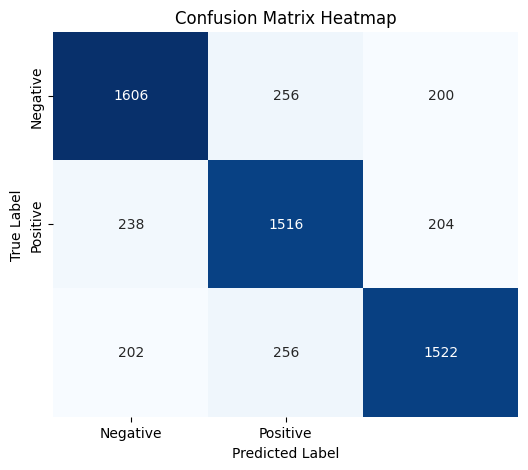

In [30]:
cm = confusion_matrix(y_test, predicted_sentiments)
# Plotting the confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
# Classification Report (Precision, Recall, F1-Score)
report = classification_report(y_test, predicted_sentiments)
print("\nClassification Report:")
print(report)

# ***Model deployement***

In [ ]:




# Define the word_index used during training
word_index = {word: i + 1 for i, word in enumerate(model.wv.index_to_key)}

# The sentiment labels
sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

# This is the preprocessing and prediction function
def predict_sentiments(text):
    # Tokenize the input text
    tokenized_text = word_tokenize(text.lower())
    
    # Convert the tokens to a sequence of indices
    sequence = [word_index.get(word, 0) for word in tokenized_text]
    
    # Pad the sequence to ensure it's the same length as the training data
    padded_sequence = pad_sequences([sequence], maxlen=100, padding='post')
    
    # Predict the sentiment using the trained model
    prediction = model2.predict(padded_sequence)
    
    # Get the predicted sentiment index (the class with the highest probability)
    predicted_index = np.argmax(prediction, axis=1)[0]
    
    # Map the predicted index to the corresponding sentiment label
    predicted_sentiment = sentiment_labels[predicted_index]
    
    return f"The predicted sentiment is: {predicted_sentiment}"

# Set up the Gradio interface
interface = gr.Interface(
    fn=predict_sentiments,  
    inputs=gr.Textbox(lines=2, placeholder="Enter a new sentence"),  
    outputs="text",  
    title="LSTM Sentiment Analysis",  #
    description="Enter a sentence, and the model will predict the sentiment as Negative, Neutral, or Positive.",  # Description of the app
    theme="huggingface"  
)

# Launch the interface
interface.launch(share=False)


* Running on local URL:  http://127.0.0.1:7869

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [56]:
interface = gr.Interface(
    fn=predict_sentiments,  
    inputs=gr.Textbox(lines=2, placeholder="Enter a new sentence"),  
    outputs="text",  
    title="LSTM Sentiment Analysis",  #
    description="Enter a sentence, and the model will predict the sentiment as Negative, Neutral, or Positive.",  # Description of the app
    theme="huggingface"  
)

# Launch the interface
interface.launch(share=False)

* Running on local URL:  http://127.0.0.1:7870

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [ ]:
interface = gr.Interface(
    fn=predict_sentiments,  
    inputs=gr.Textbox(lines=2, placeholder="Enter a new sentence"),  
    outputs="text",  
    title="LSTM Sentiment Analysis",  #
    description="Enter a sentence, and the model will predict the sentiment as Negative, Neutral, or Positive.",  # Description of the app
    theme="huggingface"  
)

# Launch the interface
interface.launch(share=False)

* Running on local URL:  http://127.0.0.1:7871

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
